# Tareas

In [1]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
            Parámetros.
            ---------------
            alpha = Learning rate
            max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]} # Con fines de graficación
    
    def gradientDescent(self, x, y): 
        """
            Parámetros:
            ---------------
            x = vector de entrenamiento de features
            y = vector de entrenamiento de variable a predecir (target) 
        """

        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)

        i=0
        prep_J = 0
        m, n = Xt.shape 
        self.beta = np.zeros(n)

        while i < self.max_iters: # Actualizamos beta self.beta = self.beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            J  = self.costo(Xt, y)
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' %( str(self.beta), i ))
                self.breaking_iteration = i
                break 
            else:
                prep_J = J

            self.historia['costo'].append(J) 
            self.historia['beta'].append(self.beta) 
            i += 1
        
    def hipotesis(self, x):
        return np.dot(x, self.beta)

    def costo(self, x, y): 
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m)

    def gradiente(self, x, y): 
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(x.T, error) / m

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

In [2]:
from sympy import symbols, Matrix, Transpose, diff, simplify

In [3]:
# beta_0 y beta_1
b0,b1 = symbols('beta_0, beta_1')

# m es un parámetro
m = 10

# Construimos los vectores X y Y
X = [symbols(f'x_{i}') for i in range(m)]
Y = [symbols(f'y_{i}') for i in range(m)]

# Construimos J
J = 0
for x,y in zip(X,Y):
    J += 1/(2*m) * (y - b0 - b1*x)**2

In [4]:
# Definimos yhat
def y_hat(x):
    return b0 + b1*x

Queremos ver que 

$$
\frac{\partial}{\partial \beta_0} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right)
$$

In [5]:
g = 0
for i in range(m):
    g += 1/m * (y_hat(X[i]) - Y[i])*1

simplify(g - diff(J, 'beta_0')) == 0

True

Ahora queremos ver que 

$$
\frac{\partial}{\partial \beta_0} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}
$$

In [6]:
g = 0
for i in range(m):
    g += 1/m * (y_hat(X[i]) - Y[i])*X[i]
    
simplify(g - diff(J, 'beta_1')) == 0

True

## Problema 2

In [7]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 



In [8]:
# leemos datos
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')

In [9]:
# Calculamos valores del cotorno de J

b0,b1 = symbols('b0, b1')
J = 0
for x,y in zip(X,Y):
    J += 1/(2*m) * (y - b0 - b1*x)**2
    
xs, ys, zs = [], [], []
z_contour = np.zeros((25,25))
for i,x in enumerate(np.linspace(-1,1,25)):
    for j,y in enumerate(np.linspace(-1,1,25)):
        xs.append(x)
        ys.append(y)
        
        z = float(J.subs({'b0':x,'b1':y}))
        zs.append(z)
        z_contour[j,i] = z

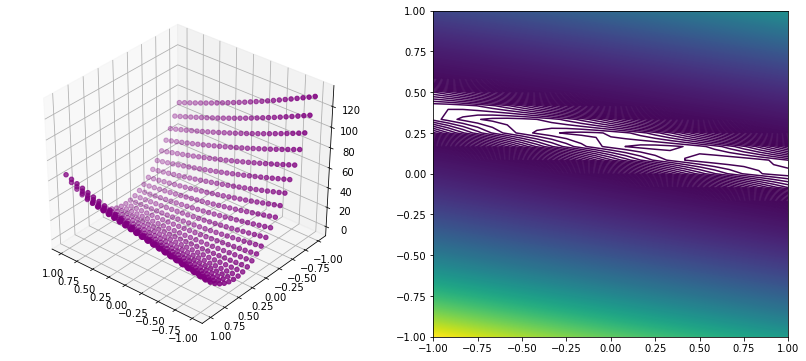

In [10]:
# Graficamos
def plotModelo(X, Y):
    fig = plt.figure(figsize=(14, 6))
    
    # Gráfica 3d
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.scatter(xs, ys, zs, color="purple")
    ax1.view_init(elev=35, azim=-230)
    
    # Contorno
    ax2 = fig.add_subplot(122)
    ax2.contour(np.linspace(-1,1,25), np.linspace(-1,1,25), z_contour, levels = 1000, zorder = -1)
    
    plt.show() 

plotModelo(X,Y)

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.



La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


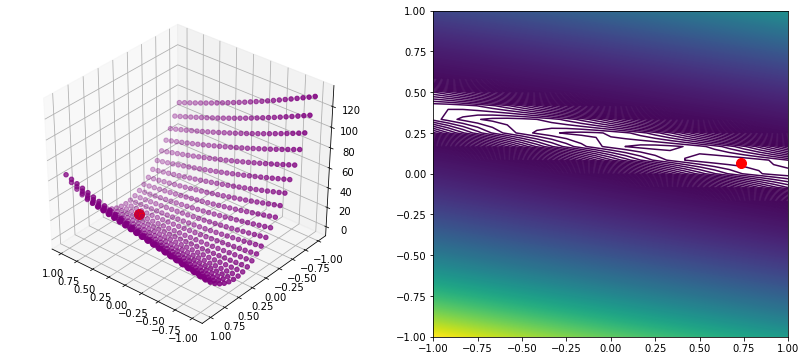

In [11]:
def plotModelo(X, Y, r):
    fig = plt.figure(figsize=(14, 6))
    
    # Gráfica 3d
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.scatter(xs, ys, zs, color="purple")
    ax1.view_init(elev=35, azim=-230)
    
    # Contorno
    ax2 = fig.add_subplot(122)
    ax2.contour(np.linspace(-1,1,25), np.linspace(-1,1,25), z_contour, levels = 1000, zorder = -1)
    
    # Añadimos punto al que converge
    b0 = r.beta[0]
    b1 = r.beta[1]
    ax1.scatter(b0,b1, float(J.subs({'b0':b0,'b1':b1})), c='red', s=100)
    ax2.scatter(b0,b1, c='red', s=100, zorder = 1)
    
    plt.show()
    
r  = RegresionLineal(alpha = .03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)
plotModelo(X,Y,r)

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

In [12]:
def plotModelo(X, Y, r, iteracion=0):
    fig = plt.figure(figsize=(14, 6))
    
    # Gráfica 3d
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.scatter(xs, ys, zs, color="purple")
    ax1.view_init(elev=35, azim=-230)
    
    # Contorno
    ax2 = fig.add_subplot(122)
    ax2.contour(np.linspace(-1,1,25), np.linspace(-1,1,25), z_contour, levels = 1000, zorder = -1)
    
    # Añadimos punto al que converge
    b0 = r.beta[0]
    b1 = r.beta[1]
    ax1.scatter(b0,b1, float(J.subs({'b0':b0,'b1':b1})), c='red', s=100)
    ax2.scatter(b0,b1, c='red', s=100, zorder = 1)
    
    # Añadimos iteración
    if iteracion >= len(r.historia['beta']):
        iteracion = len(r.historia['beta']) - 1
    b0 = r.historia['beta'][iteracion][0]
    b1 = r.historia['beta'][iteracion][1]
    ax1.scatter(b0,b1, float(J.subs({'b0':b0,'b1':b1})), c='black', s=100)
    ax2.scatter(b0,b1, c='black', s=100, zorder = 1)
    
    plt.show()
    
    
r  = RegresionLineal(alpha = .03, max_iters=1200, tols=0.0000001)
r.gradientDescent(X, Y)
    
interact(plotModelo, 
          X = fixed(X), 
          Y = fixed(Y),
          r = fixed(r),
          iteracion = (0,10000));

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


interactive(children=(IntSlider(value=0, description='iteracion', max=10000), Output()), _dom_classes=('widget…

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [13]:
def plotModelo(X, Y, iteracion=0, alpha = .03):
    r  = RegresionLineal(alpha = alpha, max_iters=10000, tols=0.0000001)
    r.gradientDescent(X, Y)

    fig = plt.figure(figsize=(14, 6))
    
    # Gráfica 3d
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.scatter(xs, ys, zs, color="purple")
    ax1.view_init(elev=35, azim=-230)
    
    # Contorno
    ax2 = fig.add_subplot(122)
    ax2.contour(np.linspace(-1,1,25), np.linspace(-1,1,25), z_contour, levels = 1000, zorder = -1)
    
    # Añadimos punto al que converge
    b0 = r.beta[0]
    b1 = r.beta[1]
    ax1.scatter(b0,b1, float(J.subs({'b0':b0,'b1':b1})), c='red', s=100)
    ax2.scatter(b0,b1, c='red', s=100, zorder = 1)
    
    # Añadimos iteración
    if iteracion >= len(r.historia['beta']):
        iteracion = len(r.historia['beta']) - 1
    b0 = r.historia['beta'][iteracion][0]
    b1 = r.historia['beta'][iteracion][1]
    ax1.scatter(b0,b1, float(J.subs({'b0':b0,'b1':b1})), c='black', s=100)
    ax2.scatter(b0,b1, c='black', s=100, zorder = 1)
    
    plt.show()
    
interact(plotModelo, 
          X = fixed(X), 
          Y = fixed(Y), 
          iteracion = (0,10000),
          alpha = (.005, .1, .005));

interactive(children=(IntSlider(value=0, description='iteracion', max=10000), FloatSlider(value=0.03, descript…

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [14]:
# leemos datos
X = np.loadtxt('chirps.txt')
X,Y = X[:,0], X[:,1]

In [15]:
def plotModelo(x,y,rl,iteracion=-1):
    modelo = lambda x,b,m: b + m*x 
    _beta = rl.historia['beta'][iteracion]
    fig, ax = plt.subplots(1,2, figsize=(13,7))
    ax[0].scatter(x,y, label="datos",color="lightgreen")
    
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label = 'modelo',color="coral") 
    ax[0].set_xlabel('Chirps/Second') 
    ax[0].set_ylabel('Temperature') 
    ax[0].legend(loc="best")
    
    costo = rl.historia['costo']
    iteraciones = [i for i in range(0, len(costo))] 
    ax[1].plot(iteraciones, costo, 'g', label="costo", color ="lightgreen") 
    ax[1].set_xlabel('Iteraciones')
    
    ax[1].set_ylabel('Costo') 
    ax[1].legend(loc="best")

Par encontrar el mejor valor de $\alpha$ se entrena la regresión lineal con 100 valores diferentes de $\alpha$ entre $.001$ y $.03$ y nos quedamos con el que incurrió en un menor costo. Si coincide con los mostrados en la página web.

In [16]:
mejor_costo = 100000

for alpha in np.linspace(.001,.03,100):
    r  = RegresionLineal(alpha = alpha, max_iters=1000, tols=0.0000001)
    r.gradientDescent(X, Y)
    
    costo = r.historia['costo'][-1]
    if costo < mejor_costo:
        mejor_costo = costo
        mejor_alpha = alpha
        mejor_modelo = r

<ipython-input-1-5ed12833af4d>:37: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J - prep_J) <= self.tols:
<ipython-input-1-5ed12833af4d>:35: RuntimeWarning: invalid value encountered in subtract
  self.beta = self.beta - self.alpha * self.gradiente(Xt, y)


In [17]:
'El mejor alpha es: ', mejor_modelo.alpha

('El mejor alpha es: ', 0.007151515151515151)

In [18]:
'Con beta = ', mejor_modelo.beta

('Con beta = ', array([1.81827229, 4.667171  ]))

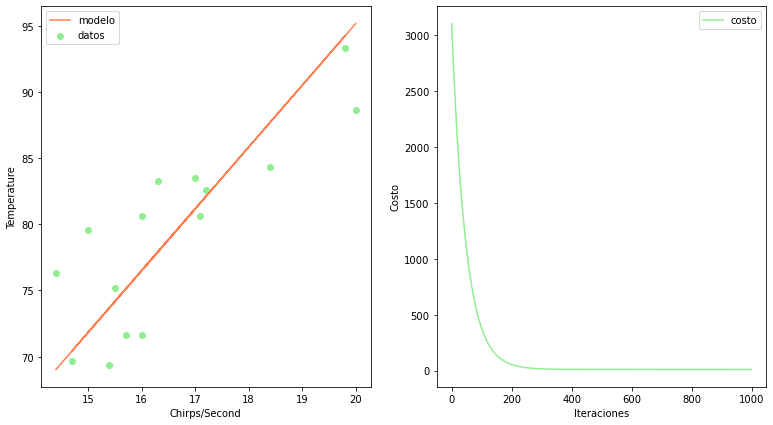

In [19]:
plotModelo(X, Y, mejor_modelo)

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [20]:
X,Y,r = {},{},{}

for i in range(1,5):
    D = np.loadtxt(f'Anscombe-{i}.txt')
    X[i],Y[i] = D[:,0], D[:,1]
    r[i] = RegresionLineal(alpha = .01, max_iters=1000, tols=0.0000001)
    r[i].gradientDescent(X[i], Y[i])

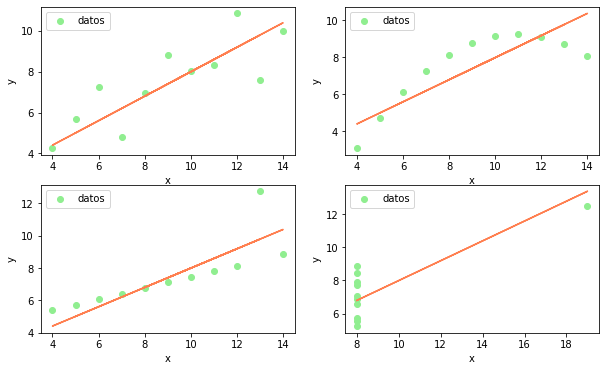

In [21]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

for i in range(1,5):

    modelo = lambda x,b,m: b + m*x 
    _beta = r[i].beta
    
    ax[int((i-1)/2)][(i-1)%2].scatter(X[i],Y[i], label="datos", color="lightgreen")
    ax[int((i-1)/2)][(i-1)%2].plot(X[i], modelo(X[i], _beta[0], _beta[1]), color="coral") 
    ax[int((i-1)/2)][(i-1)%2].set_xlabel('x') 
    ax[int((i-1)/2)][(i-1)%2].set_ylabel('y') 
    ax[int((i-1)/2)][(i-1)%2].legend(loc="best")

Veamos cuáles son los coeficientes de la regresión para los 4 modelos

In [22]:
for i in range(1,5):
    print(r[i].beta)

[2.01654833 0.59748082]
[2.01709078 0.59741721]
[2.01811207 0.59719639]
[2.01763323 0.5973536 ]


Veamos cuáles son los estadísticos muestrales de nuestros 4 conjuntos de datos

In [23]:
print('Datos     Media X  Var X   Mean Y  Var Y   Cov(X,Y)')
for i in range(1,5):
    print(f'Datos {i}: ', 
          np.mean(X[i]), '    ', 
          np.var(X[i]), '  ', 
          np.round(np.mean(Y[i]),2), '   ',
          np.round(np.var(Y[i]),2), '  ', 
          np.corrcoef(X[i],Y[i])[1][0])

Datos     Media X  Var X   Mean Y  Var Y   Cov(X,Y)
Datos 1:  9.0      10.0    7.5     3.75    0.8164205163448399
Datos 2:  9.0      10.0    7.5     3.75    0.8162365060002428
Datos 3:  9.0      10.0    7.5     3.75    0.8162867394895981
Datos 4:  9.0      10.0    7.5     3.75    0.8165214368885031


Los 4 conjuntos de datos tienen las mismos estadísticos y el modelo de regresión que mejor los ajusta también resulta ser el mismo pese a que los datos son sumamente distintos. Esta es la importancia de no solo confiarnos de estadísticas descriptivas sino también observar los datos en gráficas

Para el primer conjunto de datos tiene sentido hacer uso del modelo de regresión

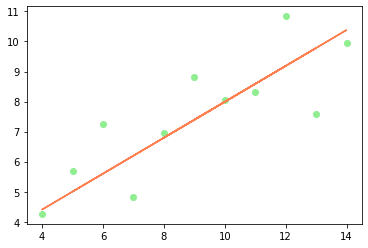

In [24]:
plt.scatter(X[1],Y[1], color="lightgreen")
_beta = r[1].beta
plt.plot(X[1], modelo(X[1], _beta[0], _beta[1]), color = "coral")
plt.show()

Para el segundo conjunto de datos tiene más sentido hacer uso de un modelo cuadrático (o transformar los datos con anterioridad)

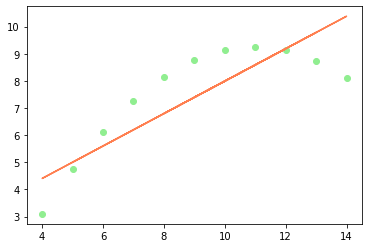

In [25]:
plt.scatter(X[2],Y[2], color="lightgreen")
_beta = r[2].beta
plt.plot(X[2], modelo(X[2], _beta[0], _beta[1]), color="coral")
plt.show()

Para el tercer conjunto de datos es importante limpiar la observación en x=13 que probablemente sea un outlier y modifica drásticamente el resultado del modelo

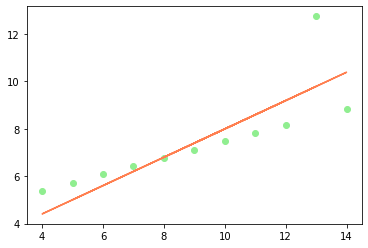

In [26]:
plt.scatter(X[3],Y[3], color="lightgreen")
_beta = r[3].beta
plt.plot(X[3], modelo(X[3], _beta[0], _beta[1]), color="coral")
plt.show()

Para el cuarto conjunto de datos es importante limpiar la observación en x=19 que probablemente sea un outlier y modifica drásticamente el resultado del modelo

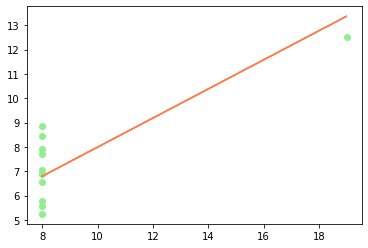

In [27]:
plt.scatter(X[4],Y[4], color="lightgreen")
_beta = r[4].beta
plt.plot(X[4], modelo(X[4], _beta[0], _beta[1]),color="coral")
plt.show()

## Problema 5

Use el archivo `radioactive_decay.dat`

In [28]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

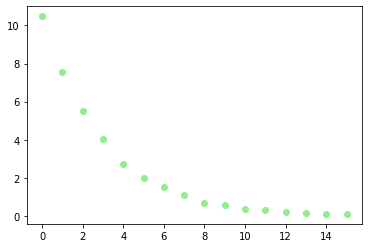

In [29]:
# leemos datos
D = np.loadtxt('radioactive_decay.txt')
X,Y = D[:,0], D[:,1]
plt.scatter(X,Y, color="lightgreen")

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

La transformación logaritmo puesto que los datos parece que presentan un decay exponencial

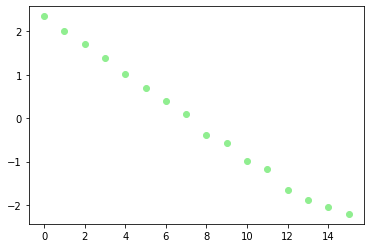

In [30]:
plt.scatter(X,np.log(Y), color="lightgreen")

In [31]:
D[:,0] = X
D[:,1] = np.log(Y)
np.savetxt('transform_radioactive_decay.txt', D)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

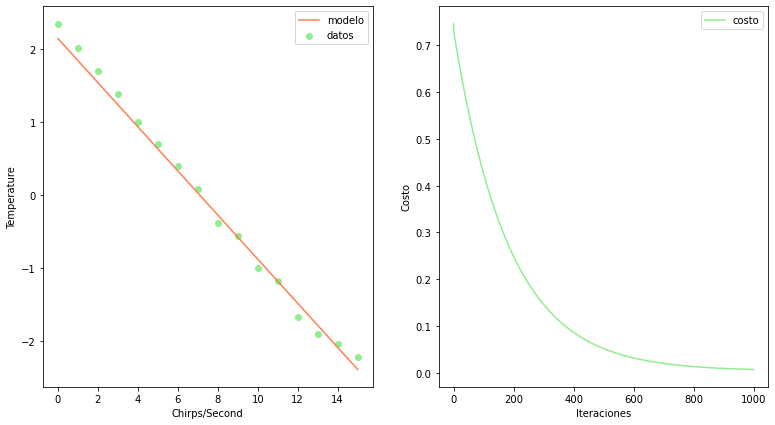

In [32]:
D = np.loadtxt('transform_radioactive_decay.txt')
X,Y = D[:,0], D[:,1]
r = RegresionLineal(alpha = .01, max_iters=1000, tols=0.0000001)
r.gradientDescent(X, Y)
plotModelo(X,Y,r)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Valores de $\beta$ que mejor ajustan

In [33]:
r.beta

array([ 2.14474828, -0.3018999 ])

En el espacio original el modelo cambia, el modelo ya no es
$$
y = \beta_0 + \beta_1 x
$$

Sino
$$
y = e^{\beta_0 + \beta_1 x}
$$

Donde $\beta_0$ y $\beta_1$ son los valores de $\beta$ que mejor ajustan los datos en el espacio transformado

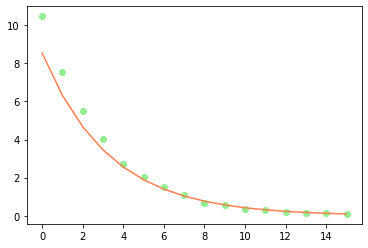

In [34]:
D = np.loadtxt('radioactive_decay.txt')
X,Y = D[:,0], D[:,1]

plt.scatter(X,Y, color="lightgreen")
modelo = lambda x,b,m: np.exp(b + m*x)
_beta = r.beta
plt.plot(X, modelo(X, _beta[0], _beta[1]), color="coral")
plt.show()